In [2]:
DIR=""
FILE="filtered_packet_fields.csv"

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
X = pd.read_csv(DIR+FILE)

# Display the first 5 rows
print(X.head())

  Ethernet type IP proto IP flags TCP dport UDP dport  IP len TCP flags  \
0          IPv4      tcp      NaN     49188       NaN    40.0        FA   
1          IPv4      tcp      NaN     49486       NaN    40.0        FA   
2          IPv4      tcp       DF  kerberos       NaN   273.0        PA   
3          IPv4      tcp       DF      1032       NaN  1572.0        PA   
4          IPv4      tcp       DF      1033       NaN    52.0        SA   

  attack_label  flow_id  
0       BENIGN        1  
1       BENIGN        3  
2       BENIGN        5  
3       BENIGN        6  
4       BENIGN        7  


In [5]:
X.describe()

,IP len,flow_id
count,1.889014e+06,1.889052e+06
mean,2.513812e+02,1.236311e+06
std,7.409370e+02,8.618044e+05
min,2.800000e+01,1.000000e+00
25%,4.400000e+01,4.426980e+05
50%,6.000000e+01,1.032738e+06
75%,1.120000e+02,1.991832e+06
max,2.340000e+04,2.827677e+06


In [6]:
X.columns

Index(['Ethernet type', 'IP proto', 'IP flags', 'TCP dport', 'UDP dport',
       'IP len', 'TCP flags', 'attack_label', 'flow_id'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X["TCP dport"])

LabelEncoder()

In [8]:
X = X.drop("flow_id", axis="columns")

In [9]:
# list(le.classes_)

In [10]:
# X["Ethernet type"] = le.transform(X["Ethernet type"])

In [11]:
X.loc[X['TCP dport'].apply(lambda x: isinstance(x, str)), 'TCP dport'].unique()

array(['49188', '49486', 'kerberos', ..., '10294', '10743', '10322'],
      dtype=object)

In [12]:
def is_non_numeric_string(x):
    if isinstance(x, str):
        try:
            float(x)
            return False  # It's a numeric string
        except ValueError:
            return True   # Not a numeric string
    return False

X.loc[X['TCP dport'].apply(is_non_numeric_string), 'TCP dport'].unique()

array(['kerberos', 'ldap', 'http', 'netbios_ssn', 'epmap', 'https', 'ftp',
       'submissions', 'ssh', 'socks', 'rmiregistry', 'rootd',
       'microsoft_ds', 'openvpn', 'rmtcfg', 'lotusnote', 'xtelw', 'xtel',
       'support', 'groupwise', 'domain', 'http_alt', 'proofd',
       'sa_msg_port', 'ms_sql_s', 'supfiledbg', 'datametrics',
       'ingreslock', 'skkserv', 'kermit', 'ms_sql_m', 'radius_acct',
       'dircproxy', 'gnunet', 'frox', 'codasrv', 'cvspserver', 'venus',
       'ospfapi', 'ospf6d', 'zebrasrv', 'mon', 'f5_globalsite',
       'afbackup', 'afmbackup', 'gpsd', 'fido', 'bacula_dir', 'mysql',
       'tproxy', 'ms_wbt_server', 'tfido', 'codasrv_se', 'dict', 'gsiftp',
       'gds_db', 'zebra', 'nfs', 'icpv2', 'isisd', 'radius',
       'gsigatekeeper', 'venus_se', 'svn', 'distcc', 'daap', 'sysrqd',
       'epmd', 'sieve', 'iax', 'remctl', 'pcrd', 'enbd_cstatd', 'sip_tls',
       'xmpp_client', 'hostmon', 'nrpe', 'x11_2', 'x11_1', 'x11_3',
       'x11_5', 'x11_4', 'x11_6', 'x1

In [4]:
port_name_to_number = {'kerberos': 88,    'ldap': 389,    'http': 80,    'netbios_ssn': 139,    'epmap': 135,    'https': 443,    'ftp': 21,    'submissions': 465,    'ssh': 22,    'socks': 1080,    'rmiregistry': 1099,    'rootd': 1094,    'microsoft_ds': 445,    'openvpn': 1194,    'rmtcfg': 1196,    'lotusnote': 1352,    'xtelw': 1314,    'xtel': 1313,    'support': 1527,    'groupwise': 1677,    'domain': 53,    'http_alt': 8080,    'proofd': 1914,    'sa_msg_port': 1640,    'ms_sql_s': 1433,    'supfiledbg': 871,    'datametrics': 1645,    'ingreslock': 1524,    'skkserv': 1178,    'kermit': 1649,    'ms_sql_m': 1434,    'radius_acct': 1813,    'dircproxy': 57000,    'gnunet': 2086,    'frox': 2121,    'codasrv': 3703,    'cvspserver': 2401,    'venus': 2430,    'ospfapi': 2604,    'ospf6d': 2606,    'zebrasrv': 2600,    'mon': 2583,    'f5_globalsite': 2792,    'afbackup': 2988,    'afmbackup': 2989,    'gpsd': 2947,    'fido': 60179,    'bacula_dir': 9101,    'mysql': 3306,    'tproxy': 8081,    'ms_wbt_server': 3389,    'tfido': 60177,    'codasrv_se': 3704,    'dict': 2628,    'gsiftp': 2811,    'gds_db': 3050,    'zebra': 2601,    'nfs': 2049,    'icpv2': 48128,    'isisd': 2608,    'radius': 1812,    'gsigatekeeper': 2119,    'venus_se': 2431,    'svn': 3690,    'distcc': 3632,    'daap': 3689,    'sysrqd': 4094,    'epmd': 4369,    'sieve': 4190,    'iax': 4569,    'remctl': 4373,    'pcrd': 4600,    'enbd_cstatd': 8873,    'sip_tls': 5061,    'xmpp_client': 5222,    'hostmon': 5555,    'nrpe': 5666,    'x11_2': 6001,    'x11_1': 6000,    'x11_3': 6002,    'x11_5': 6004,    'x11_4': 6003,    'x11_6': 6005,    'x11_7': 6006,    'gnutella_rtr': 6346,    'sge_execd': 6445,    'ircd': 6667,    'xmpp_server': 5269,    'afs3_rmtsys': 7000,    'afs3_volser': 7007,    'afs3_errors': 7008,    'afs3_kaserver': 7004,    'afs3_bos': 7007,    'afs3_vlserver': 7003,    'afs3_update': 7008,    'afs3_prserver': 7002,    'ircs_u': 6697,    'bgpsim': 17900,    'cfengine': 5308,    'amqp': 5672,    'radmin_port': 4899,    'f5_iquery': 4353,    'mrtd': 2620,    'mysql_proxy': 4040,    'afs3_fileserver': 7000,    'fax': 4557,    'syslog_tls': 6514,    'amqps': 5671,    'sane_port': 6566,    'sip': 5060,    'distmp3': 48200,    'suucp': 4031,    'noclog': 4590,    'gnutella_svc': 6347,    'canna': 5680,    'munin': 4949,    'hylafax': 4559,    'afs3_callback': 7001,    'cisco_sccp': 2000,    'cfinger': 2003,    'rtcm_sc104': 2101,    'gris': 2135,    'ripngd': 521,    'ospfd': 2604,    'ripd': 2602,    'isns': 3205,    'nsca': 5667,    'bacula_fd': 9102,    'postgresql': 5432,    'freeciv': 5556,    'x11': 6000,    'omniorb': 2809,    'sge_qmaster': 6444,    'mtn': 4691,    'puppet': 8140,    'xinetd': 9098,    'bacula_sd': 9103,    'zope': 8080,    'zabbix_trapper': 10051,    'zabbix_agent': 10050,    'amandaidx': 10083,    'git': 9418,    'hkp': 11371,    'webmin': 10000,    'amidxtape': 10082,    'kamanda': 10081,    'zope_ftp': 8021,    'amanda': 10080,    'dicom': 11112,    'nbd': 10809,    'xpilot': 15345,    'sgi_cad': 17006,    'isdnlog': 20000,    'vboxd': 20012,    'gsidcap': 21160,    'wnn6': 22273,    'db_lsp': 22800,    'snpp': 444,    'enbd_sstatd': 22840,    'iscsi_target': 3260,    'nut': 3493,    'pop3': 110,    'printer': 515,    'shell': 514,    'imap2': 143,    'rtsp': 554,    'submission': 587,    'smux': 199,    'telnet': 23,    'ftps': 990,    'pop3s': 995,    'whois': 43,    'tacacs': 49,    'tcpmux': 1,    'ipp': 631,    'ldaps': 636,    'svrloc': 427,    'echo': 7,    'kpasswd': 464,    'kerberos_adm': 749,    'gopher': 70,    'spamd': 783,    'klogin': 543,    'moira_update': 775,    'cmip_man': 164,    'smtp': 25,    'imaps': 993,    'qotd': 17,    'sunrpc': 111,    'auth': 113,    'finger': 79,    'poppassd': 106,    'afpovertcp': 548,    'daytime': 13,    'snmp': 161,    'chargen': 19,    'time': 37,    'font_service': 7100,    'ftp_data': 20,    'nntp': 119,    'kshell': 544,    'bgp': 179,    'bgpd': 2605,    'exec': 512,    'rsync': 873,    'nntps': 563,    'login': 513,    'telnets': 992,    'discard': 9,    'clc_build_daemon': 8990,    'xmms2': 9667,    'binkp': 24554,}

In [14]:
def map_service_or_number(v):
    if isinstance(v, str) and v.isdigit():
        return v
    mapped = port_name_to_number.get(v)
    return mapped if mapped is not None else v

X['TCP dport'] = X['TCP dport'].apply(map_service_or_number)

In [15]:
X.loc[X['TCP dport'].apply(lambda x: isinstance(x, str)), 'TCP dport'].unique()

array(['49188', '49486', '1032', ..., '10294', '10743', '10322'],
      dtype=object)

In [16]:
print(X.head())

  Ethernet type IP proto IP flags TCP dport UDP dport  IP len TCP flags  \
0          IPv4      tcp      NaN     49188       NaN    40.0        FA   
1          IPv4      tcp      NaN     49486       NaN    40.0        FA   
2          IPv4      tcp       DF        88       NaN   273.0        PA   
3          IPv4      tcp       DF      1032       NaN  1572.0        PA   
4          IPv4      tcp       DF      1033       NaN    52.0        SA   

  attack_label  
0       BENIGN  
1       BENIGN  
2       BENIGN  
3       BENIGN  
4       BENIGN  


In [17]:
def encode(x,labels):
    for label in labels:
        le = LabelEncoder()
        le.fit(x[label])
        x[label] = le.transform(x[label])

In [18]:
# encode(X,["Ethernet type","IP proto","IP flags", "TCP dport","UDP dport", "TCP flags"])

In [19]:
encode(X,["Ethernet type","IP proto","IP flags", "UDP dport", "TCP flags"])

In [20]:
print(X.head())

   Ethernet type  IP proto  IP flags TCP dport  UDP dport  IP len  TCP flags  \
0              1         2         2     49188      61410    40.0          2   
1              1         2         2     49486      61410    40.0          2   
2              1         2         0        88      61410   273.0          7   
3              1         2         0      1032      61410  1572.0          7   
4              1         2         0      1033      61410    52.0         13   

  attack_label  
0       BENIGN  
1       BENIGN  
2       BENIGN  
3       BENIGN  
4       BENIGN  


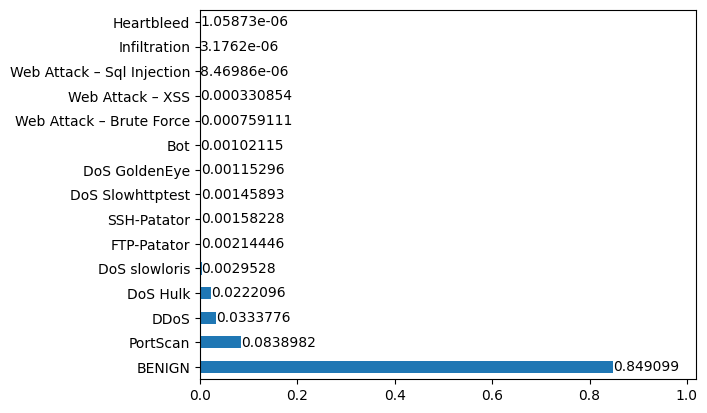

In [21]:
y = X.pop("attack_label")
ax = (y.value_counts()/y.size).plot.barh()
ax.margins(x=0.2)
for container in ax.containers:
    ax.bar_label(container)

In [22]:
type(y)

pandas.core.series.Series

In [23]:
y.loc[y == "BENIGN"] = 0
y.loc[y != 0] = 1
y = y.astype(int)

C:\Users\Jer\AppData\Local\Temp\ipykernel_76716\4215623757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == "BENIGN"] = 0
C:\Users\Jer\AppData\Local\Temp\ipykernel_76716\4215623757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y != 0] = 1


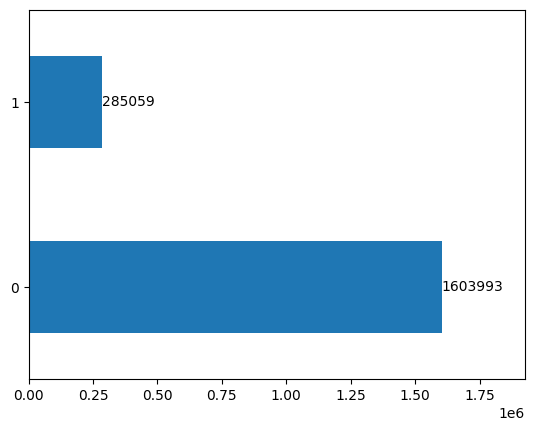

In [48]:
ax = (y.value_counts()).plot.barh()
ax.margins(x=0.2)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f") 

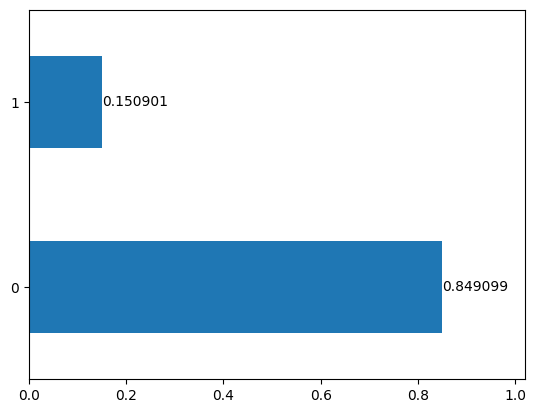

In [49]:
ax = (y.value_counts()/y.size).plot.barh()
ax.margins(x=0.2)
for container in ax.containers:
    ax.bar_label(container)

In [25]:
# lea = LabelEncoder()
# lea.fit(y)
# lea.classes_

In [26]:
# y = lea.transform(y)

In [27]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1889047    0
1889048    0
1889049    0
1889050    0
1889051    0
Name: attack_label, Length: 1889052, dtype: int32

<AxesSubplot: >

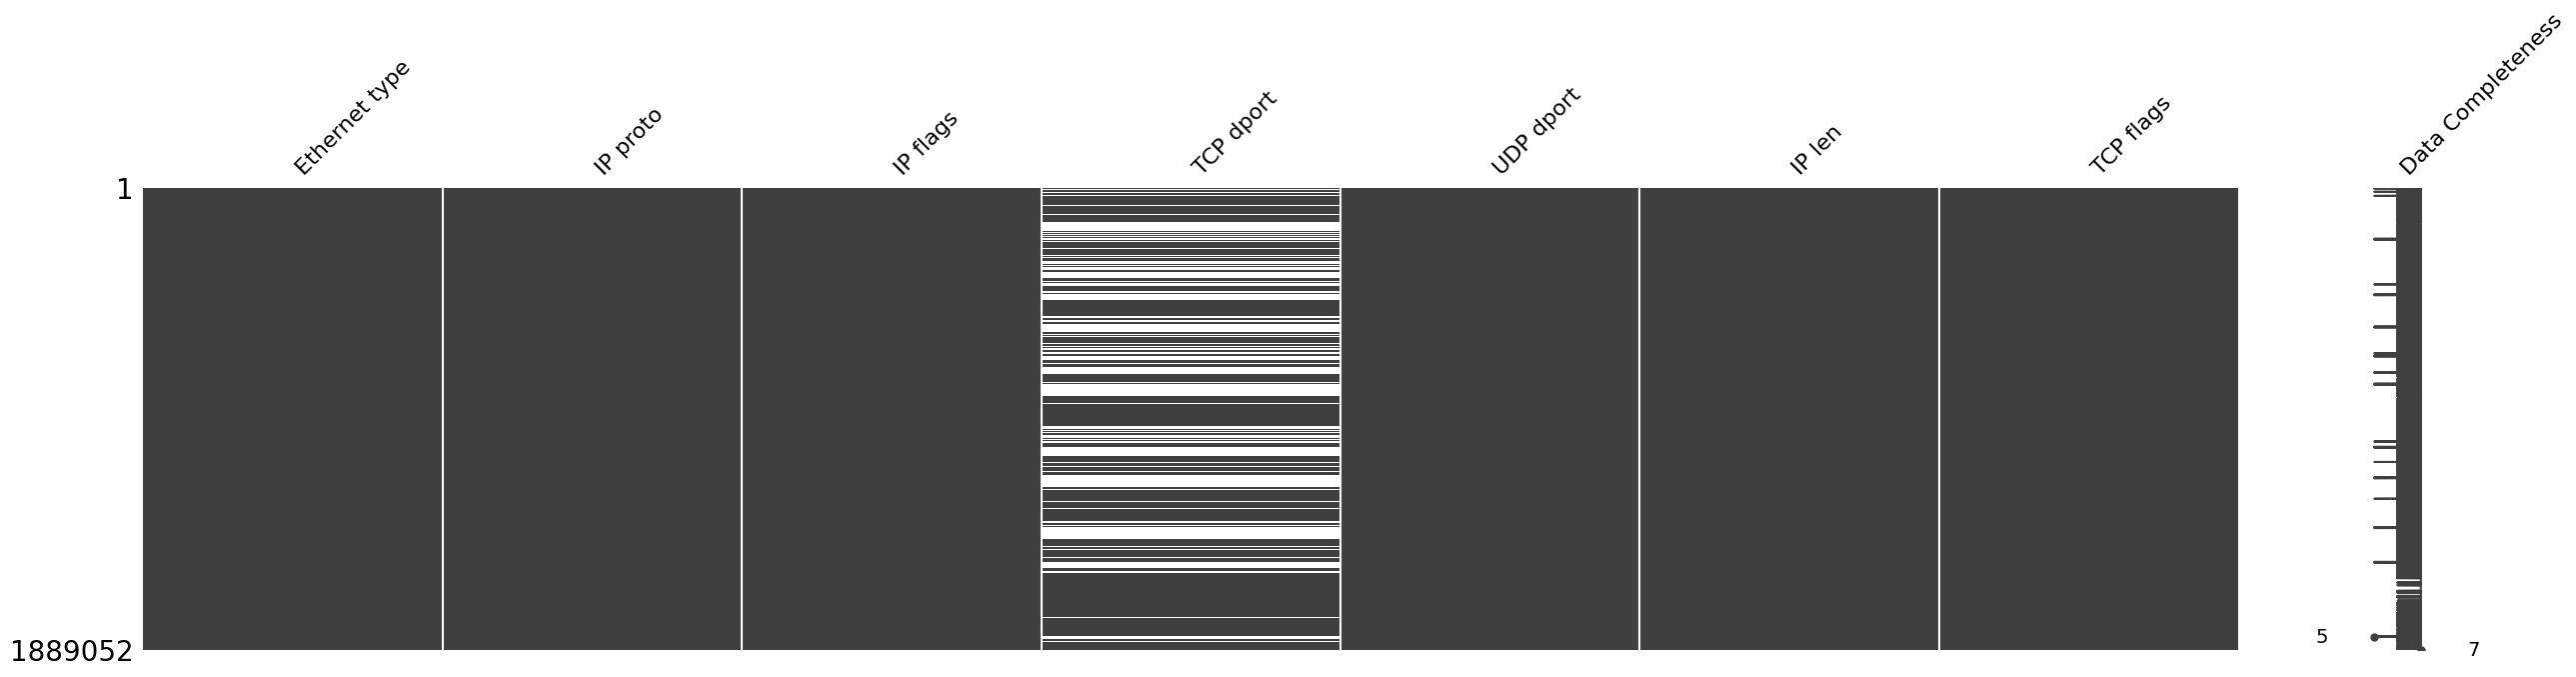

In [28]:
import missingno as msno

msno.matrix(X, labels=True, figsize=(30, 6))

In [29]:
print(X.head())

   Ethernet type  IP proto  IP flags TCP dport  UDP dport  IP len  TCP flags
0              1         2         2     49188      61410    40.0          2
1              1         2         2     49486      61410    40.0          2
2              1         2         0        88      61410   273.0          7
3              1         2         0      1032      61410  1572.0          7
4              1         2         0      1033      61410    52.0         13


In [30]:
from sklearn.model_selection import train_test_split

features = X.columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y
)


In [31]:
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline

# median_imputer = SimpleImputer(strategy="mean")

# X_train = median_imputer.fit_transform(X_train)
# X_test = median_imputer.transform(X_test)

In [32]:
print(y)
print(y.unique())
print(y.dtype)

0          0
1          0
2          0
3          0
4          0
          ..
1889047    0
1889048    0
1889049    0
1889050    0
1889051    0
Name: attack_label, Length: 1889052, dtype: int32
[0 1]
int32


In [66]:
# your_code
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
clf.fit(X_train, y_train)
# print(f"AUROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.4f}")

DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)

In [67]:
print(f"AUROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.4f}")

AUROC: 0.8160


In [68]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
# tree.plot_tree(clf, proportion=True)
# plt.show()


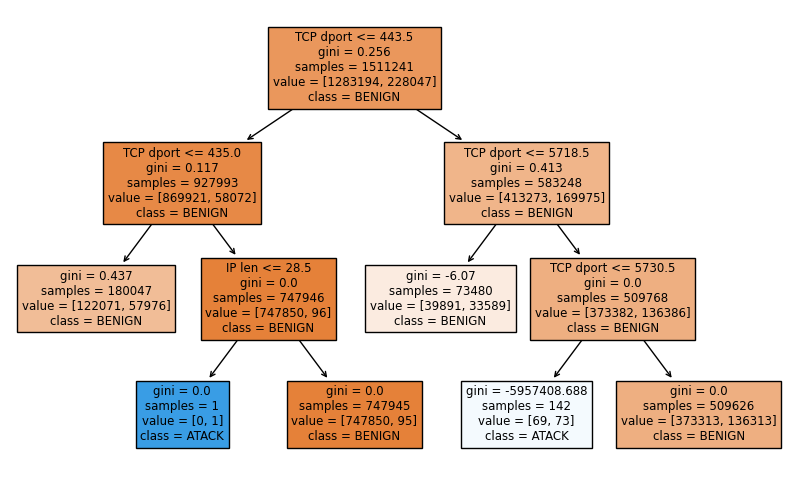

In [69]:
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=["BENIGN", "ATACK"])

plt.savefig('decision_tree.png', dpi=1000, bbox_inches='tight')
# plt.savefig('decision_tree.png', dpi=1000)